In [3]:
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Project Files/Filtered_Data.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,18,0,0,No,Private,Rural,111.38,38.4,smokes,0
1,Female,18,0,0,No,Private,Urban,80.05,24.2,never smoked,0
2,Female,18,0,0,No,Self-employed,Rural,93.88,22.2,never smoked,0
3,Male,18,0,0,No,Private,Rural,70.34,24.2,Unknown,0
4,Male,18,0,0,No,Private,Urban,112.17,31.7,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4153,Male,82,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
4154,Female,82,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0
4155,Female,82,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
4156,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000
mean,50.334776,0.115200,0.065897,108.238742,29.925349,0.059163
std,17.893909,0.319301,0.248132,47.518409,6.101635,0.235958
min,18.000000,0.000000,0.000000,55.120000,14.100000,0.000000
25%,36.000000,0.000000,0.000000,77.452500,25.500000,0.000000
50%,51.000000,0.000000,0.000000,92.360000,29.200000,0.000000
75%,64.000000,0.000000,0.000000,115.897500,33.500000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
x = df.drop(columns ="stroke")
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,18,0,0,No,Private,Rural,111.38,38.4,smokes
1,Female,18,0,0,No,Private,Urban,80.05,24.2,never smoked
2,Female,18,0,0,No,Self-employed,Rural,93.88,22.2,never smoked
3,Male,18,0,0,No,Private,Rural,70.34,24.2,Unknown
4,Male,18,0,0,No,Private,Urban,112.17,31.7,Unknown
...,...,...,...,...,...,...,...,...,...,...
4153,Male,82,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked
4154,Female,82,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked
4155,Female,82,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked
4156,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked


In [7]:
# Separating the Dependent Variable:
y = df["stroke"]

In [8]:
# Splitting the Data into train and test:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# Label Encoding for Categorical Features
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
categorical_features = ['gender', 'ever_married', 'Residence_type']
for feature in categorical_features:
    x[feature] = le.fit_transform(x[feature])
    x_train[feature] = le.transform(x_train[feature])
    x_test[feature] = le.transform(x_test[feature])

In [11]:
# One-Hot Encoding for Multi-Class Categorical Features
from sklearn.preprocessing import OneHotEncoder

one_hot_features = ['work_type', 'smoking_status']
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

x_train_encoded = enc.fit_transform(x_train[one_hot_features])
x_test_encoded = enc.transform(x_test[one_hot_features])

# Convert encoded features to DataFrame
encoded_columns = enc.get_feature_names_out(one_hot_features)
x_train_encoded = pd.DataFrame(x_train_encoded, columns=encoded_columns, index=x_train.index)
x_test_encoded = pd.DataFrame(x_test_encoded, columns=encoded_columns, index=x_test.index)

# Drop original categorical columns and replace with encoded ones
x_train = x_train.drop(columns=one_hot_features).join(x_train_encoded)
x_test = x_test.drop(columns=one_hot_features).join(x_test_encoded)

In [12]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
# Handling Imbalance with SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [14]:
# Training Model (Logistic Regression as Baseline)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_smote, y_train_smote)
y_pred = log_reg.predict(x_test)

In [15]:
# Model Evaluation

from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7188
Precision: 0.1636
Confusion Matrix:
 [[554 225]
 [  9  44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.71      0.83       779
           1       0.16      0.83      0.27        53

    accuracy                           0.72       832
   macro avg       0.57      0.77      0.55       832
weighted avg       0.93      0.72      0.79       832



## Using SVM:

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train SVM Model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train, y_train)
svm_preds = svm_model.predict(x_test)

In [23]:
# Evaluate SVM Model
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

SVM Model Performance:
Accuracy: 0.9362980769230769
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       779
           1       0.00      0.00      0.00        53

    accuracy                           0.94       832
   macro avg       0.47      0.50      0.48       832
weighted avg       0.88      0.94      0.91       832



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Using Random Forest

In [24]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)

# Evaluate Random Forest Model
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Model Performance:
Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       779
           1       1.00      0.02      0.04        53

    accuracy                           0.94       832
   macro avg       0.97      0.51      0.50       832
weighted avg       0.94      0.94      0.91       832



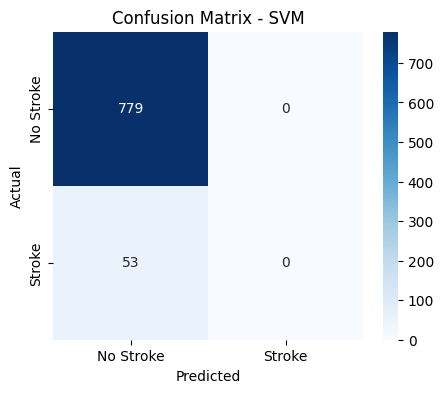

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Confusion Matrix for SVM
plot_confusion_matrix(y_test, svm_preds, "SVM")

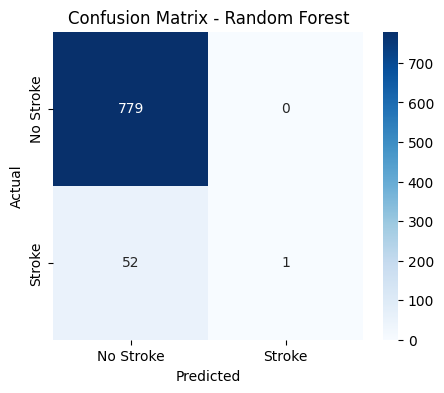

In [27]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_preds, "Random Forest")
